# ML, Data Analysis
### Machine learning: Entropy

The **entropy** measures how much a random variable (or a dataset) has disorder or uncertainty. It is often used in decision tree algorithms to measure how *diverse* or *mixed* a set of items is with respect to their class labels (similar to the **Gini impurity** mentioned earlier).
<br>**Definition:** We have a dataset with $K$ different classes (or a random variable with $K$ possible outcomes). Let's denote the probability of selecting an item of class $i$ by $p_i$. Then, the entropy is defined by:
<div style="margin-top:4px"></div>
$\large Entropy=-\sum_{i=1}^K p_i \cdot log(p_i)$
<div style="margin-bottom:4px"></div>

where the base of the logarithm is usually used to be 2, $e$, or 10.
<br>**Hint 1, Lowest value:** The lowest value of entropy is zero, and it occurs when all items are of the same class.
<br>**Hint 2, Highest value:** When the number of items in classes are the same, the $entropy$ gets its maximum value, which is $log(k)$ for a dataset with $K$ classes. This is when the dataset is at its maximum disorder.
<br> Some properties of entropy (for random variables $X$ and $Y$):
- Nonnegativity: $H(X)\geq 0$
- Subadditivity: $H(X,Y)\leq H(X)+H(Y)$
- Additivity: $H(X,Y)=H(X)+H(Y)$ if $X$ and $Y$ are independent.

<hr>

In the following, we compute the entropy for a sample of dataset.

<hr>
https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/background-knowledge

In [1]:
# Import the required module
from math import log,log2,log10
from matplotlib import pyplot as plt

In [5]:
# Calculate the entropy Impurity for a list of data labels
def entropy(data,base='e'):
    if len(data) == 0:
        return 0
    if base=='e': log_p=log
    elif base=='10': log_p=log10
    elif base=='2': log_p=log2
    else:
        raise ValueError('The base is not correct')
    # Count the occurrences of each class
    classes = set(data) # The classes
    total = len(data) # number of all items
    result = 0.0
    for c in classes:
        p=data.count(c)/total # p is never zero here
        result -= p*log_p(p) 
        
    return result 

In [6]:
# Some examples
# A sample dataset
dataset = ['apple'] * 5 + ['orange'] * 3 + ['banana'] * 4
# Calculate entropy
print(f'{dataset}')
print(f"its entropy is: {entropy(dataset):.4f}")

# Perfectly pure case (all same class), lowest entropy
one_class_case = ['apple'] * 12
print('-'*50+f'\n{one_class_case}')
print(f"its entropy is (lowest): {entropy(one_class_case):.4f}")

# Worst case (equal distribution), highest entropy
equal_probs_case = ['apple'] * 4 + ['orange'] * 4+['banana']*4
print('-'*50+f'\n{equal_probs_case}')
print(f"its entropy is (highest): {entropy(equal_probs_case):.4f}")

['apple', 'apple', 'apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'banana', 'banana', 'banana', 'banana']
its entropy is: 1.0776
--------------------------------------------------
['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple']
its entropy is (lowest): 0.0000
--------------------------------------------------
['apple', 'apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'orange', 'banana', 'banana', 'banana', 'banana']
its entropy is (highest): 1.0986


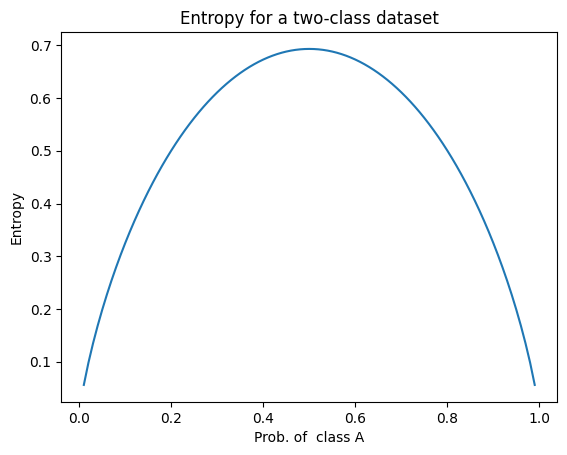

In [7]:
# Draw entropy for a dataset of two classes: A and B
# X-axis the proportion of class A
# Y-axis the value of entropy
ps=[i/100 for i in range(1,100)]
entropies=[-p*log(p)-(1-p)*log(1-p) for p in ps] # base=e
plt.plot(ps,entropies,'-')
plt.xlabel('Prob. of  class A')
plt.ylabel('Entropy')
plt.title('Entropy for a two-class dataset')
plt.show()